In [221]:
# reference: https://scikit-learn.org/stable/modules/feature_extraction.html
# https://regex101.com/r/iA5bT1/1
# https://docs.python.org/3.3/howto/regex.html

# feature_extraction.text.CountVectorizer([…])	Convert a collection of text documents to a matrix of token counts
# feature_extraction.text.HashingVectorizer([…])	Convert a collection of text documents to a matrix of token occurrences
# feature_extraction.text.TfidfTransformer([…])	Transform a count matrix to a normalized tf or tf-idf representation
# feature_extraction.text.TfidfVectorizer([…])	Convert a collection of raw documents to a matrix of TF-IDF features.

# Text feature extraction: Bag of n-gram words

import nltk
import math
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# vectorizer = CountVectorizer(tokenizer=lambda doc:doc, lowercase=False)
ngram_vectorizer = CountVectorizer(ngram_range=(1, 4), lowercase=False, token_pattern=r'\b[\D\S\w]+\b', min_df=1)


In [222]:
def plot_classification_report(classificationReport,
                              title='Classification report',
                              cmap='RdBu'):
    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')
    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
            t = line.strip().replace(' avg', '-avg').split()
            if len(t) < 2:
                   continue
            classes.append(t[0])
            v = [float(x) for x in t[1: len(t) - 1]]
            support.append(int(t[-1]))
            class_names.append(t[0])
            plotMat.append(v)
    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                  for idx, sup in enumerate(support)]
    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)
    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")
    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()

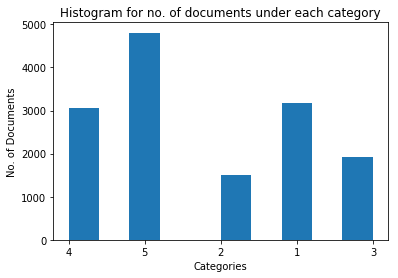

In [223]:
# load data
with open("medical_train.dat",'r') as fh:
    documents = fh.readlines()
    
# split each document into label and rest of documents
labels = []
docs = []
for i in range (0,len(documents)):
    labels.append(documents[i][0])
    docs.append(documents[i][1:])

plt.title('Histogram for no. of documents under each category')
plt.xlabel('Categories')
plt.ylabel('No. of Documents')
plt.hist(labels)
plt.show()
    

In [224]:
ngram_matrix = ngram_vectorizer.fit_transform(docs)

# split train and test data
X_train, X_test, Y_train, Y_test = train_test_split(ngram_matrix, labels, test_size=0.35, random_state=42)

# K Nearest Neighbors Classifier

In [225]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(n_neighbors=14,metric='cosine')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)

             precision    recall  f1-score   support

          1       0.14      0.13      0.14      1094
          2       0.00      0.00      0.00       544
          3       0.00      0.00      0.00       648
          4       0.10      0.01      0.01      1097
          5       0.30      0.70      0.42      1671

avg / total       0.15      0.26      0.17      5054



/Users/Simon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


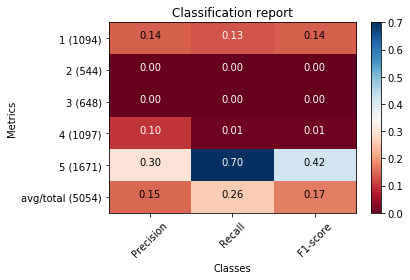

In [226]:
plot_classification_report(report)
plt.show()
plt.close()

# Decision Tree Classifier

In [227]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_features=200)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1094
          2       0.00      0.00      0.00       544
          3       0.00      0.00      0.00       648
          4       0.00      0.00      0.00      1097
          5       0.27      0.66      0.38      1671

avg / total       0.09      0.22      0.13      5054



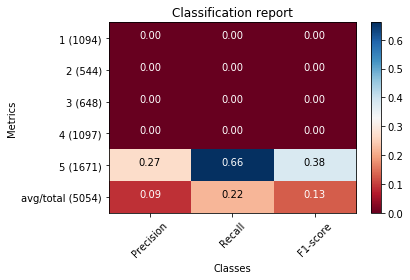

In [228]:
plot_classification_report(report)
plt.show()
plt.close()

# Extra Trees Classifier

In [229]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=6, max_features=100, random_state=7)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1094
          2       0.00      0.00      0.00       544
          3       0.00      0.00      0.00       648
          4       0.00      0.00      0.00      1097
          5       0.27      0.66      0.38      1671

avg / total       0.09      0.22      0.13      5054



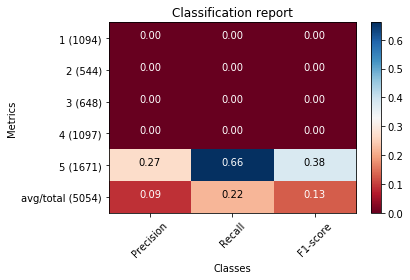

In [220]:
plot_classification_report(report)
plt.show()
plt.close()

# Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1094
          2       0.00      0.00      0.00       544
          3       0.00      0.00      0.00       648
          4       0.00      0.00      0.00      1097
          5       0.29      0.80      0.43      1671

avg / total       0.10      0.26      0.14      5054



/Users/Simon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


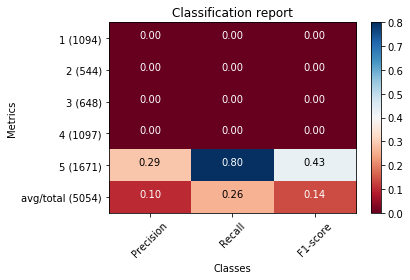

In [231]:
plot_classification_report(report)
plt.show()
plt.close()

# Random Forest Classifier

In [232]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, max_features=1000, max_depth=40, random_state=1)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
report = classification_report(Y_test, Y_pred)
print(report)

             precision    recall  f1-score   support

          1       0.00      0.00      0.00      1094
          2       0.00      0.00      0.00       544
          3       0.00      0.00      0.00       648
          4       0.00      0.00      0.00      1097
          5       0.33      1.00      0.50      1671

avg / total       0.11      0.33      0.16      5054



/Users/Simon/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


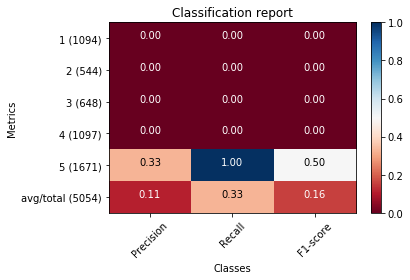

In [233]:
plot_classification_report(report)
plt.show()
plt.close()